### Try this notebook in Google Colab, Binder or SageMaker!

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/xarray/DataArray.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/InsightSoftwareConsortium/itkwidgets/HEAD?labpath=examples%2Fintegrations%2Fxarray%2FDataArray.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github.com/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/xarray/DataArray.ipynb)

In [1]:
import sys

!{sys.executable} -m pip install -q netCDF4 xarray pooch "itkwidgets[all]>=1.0a16"

In [2]:
import numpy as np
import xarray as xr
from itkwidgets import view

In [3]:
# load in the file
ds = xr.tutorial.open_dataset("ROMS_example")

# This is a way to turn on chunking and lazy evaluation. Opening with mfdataset, or
# setting the chunking in the open_dataset would also achieve this.
ds

<xarray.Dataset>
Dimensions:     (ocean_time: 2, s_rho: 30, eta_rho: 191, xi_rho: 371)
Coordinates:
    Cs_r        (s_rho) float64 ...
    lon_rho     (eta_rho, xi_rho) float64 ...
    hc          float64 ...
    h           (eta_rho, xi_rho) float64 ...
    lat_rho     (eta_rho, xi_rho) float64 ...
    Vtransform  int32 ...
  * ocean_time  (ocean_time) datetime64[ns] 2001-08-01 2001-08-08
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
Dimensions without coordinates: eta_rho, xi_rho
Data variables:
    salt        (ocean_time, s_rho, eta_rho, xi_rho) float32 ...
    zeta        (ocean_time, eta_rho, xi_rho) float32 ...
Attributes: (12/34)
    file:              ../output_20yr_obc/2001/ocean_his_0015.nc
    format:            netCDF-4/HDF5 file
    Conventions:       CF-1.4
    type:              ROMS/TOMS history file
    title:             TXLA ROMS hindcast run with dyes and oxygen
    rst_file:          ../output_20yr_obc/2001/ocean_rst.nc
    ...                ...
    compiler_flags:    -heap-arrays -fp-model fast -mt_mpi -ip -O3 -msse2 -free
    tiling:            010x012
    history:           Tue Jul 24 11:04:43 2018: /opt/nco/ncks -D 4 -t 8 /cop...
    ana_file:          /home/d.kobashi/TXLA_ROMS_reana/Functionals/ana_btflux...
    CPP_options:       TXLA2, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX, ANA_NUDGCOE...
    NCO:               netCDF Operators version 4.7.6-alpha04 (Homepage = htt...


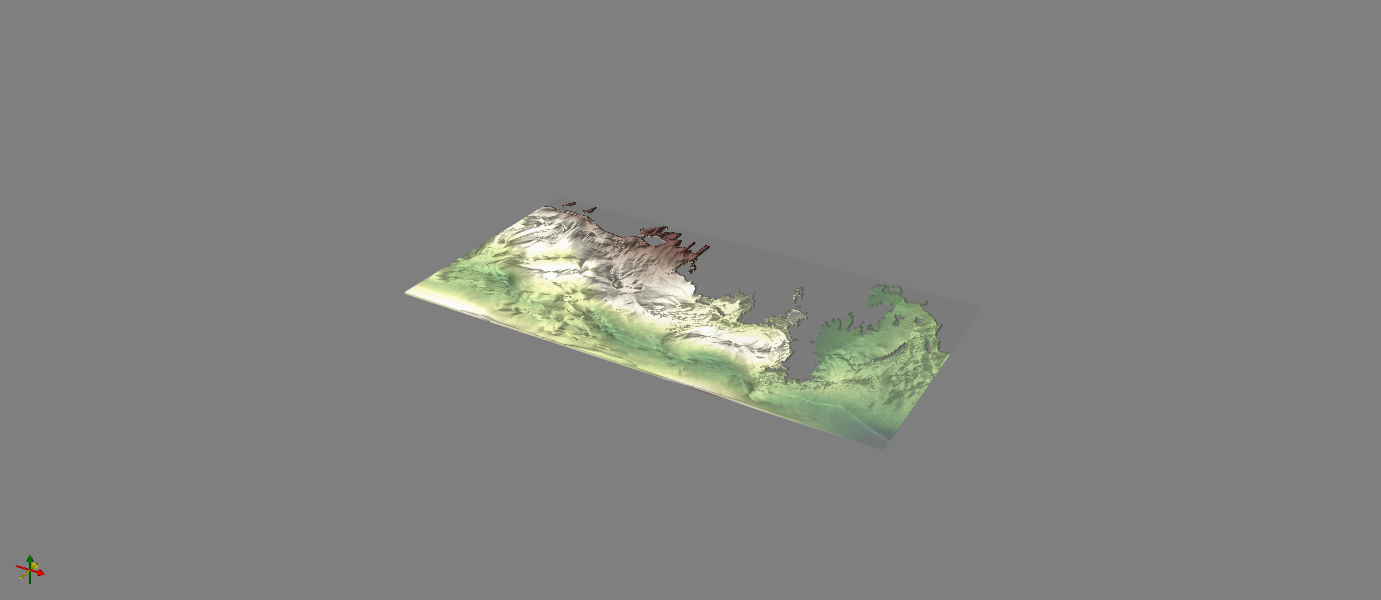
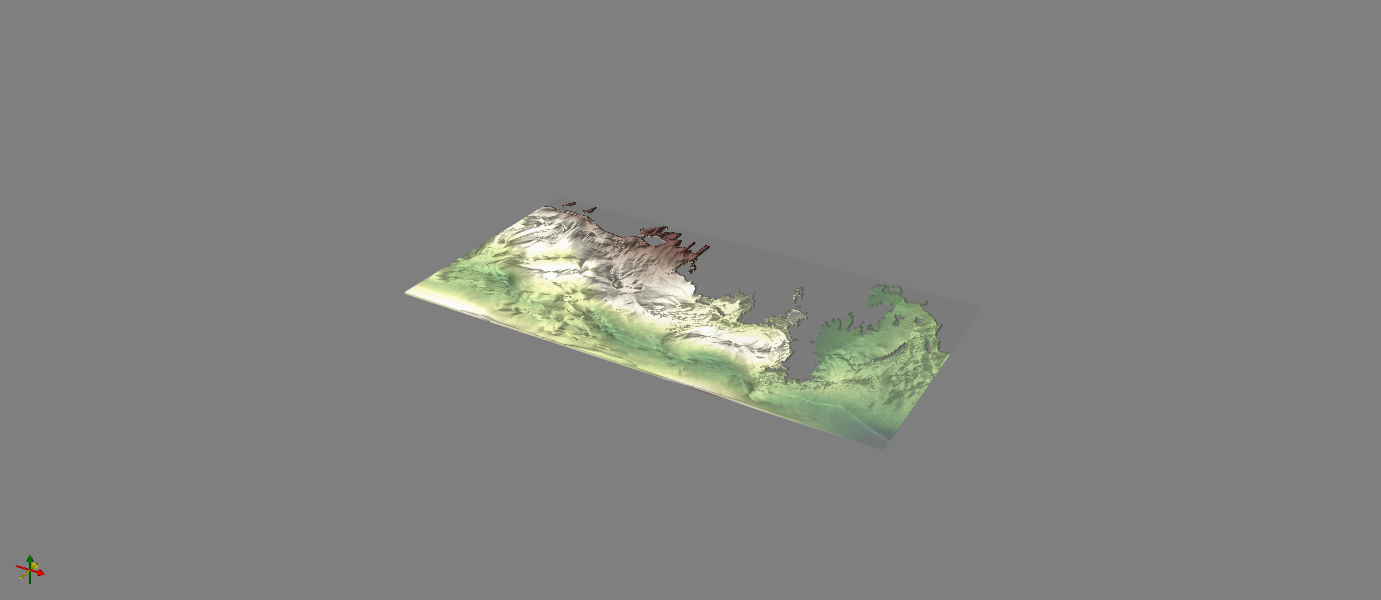

<IPython.core.display.Javascript object>

In [4]:
view(ds.zeta, ui_collapsed=False, cmap="Asymmtrical Earth Tones (6_21b)", sample_distance=0)

In [5]:
if ds.Vtransform == 1:
    Zo_rho = ds.hc * (ds.s_rho - ds.Cs_r) + ds.Cs_r * ds.h
    z_rho = Zo_rho + ds.zeta * (1 + Zo_rho / ds.h)
elif ds.Vtransform == 2:
    Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
    z_rho = ds.zeta + (ds.zeta + ds.h) * Zo_rho

ds.coords["z_rho"] = z_rho.transpose()  # needing transpose seems to be an xarray bug
ds.salt

<xarray.DataArray 'salt' (ocean_time: 2, s_rho: 30, eta_rho: 191, xi_rho: 371)>
[4251660 values with dtype=float32]
Coordinates:
    Cs_r        (s_rho) float64 -0.933 -0.8092 -0.6988 ... -0.0005206 -5.758e-05
    lon_rho     (xi_rho, eta_rho) float64 -93.6 -93.6 -93.6 ... -88.86 -88.87
    hc          float64 20.0
    h           (xi_rho, eta_rho) float64 612.1 605.4 599.0 ... 5.0 5.0 5.0
    lat_rho     (xi_rho, eta_rho) float64 27.45 27.46 27.48 ... 30.85 30.86
    Vtransform  int32 2
  * ocean_time  (ocean_time) datetime64[ns] 2001-08-01 2001-08-08
  * s_rho       (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
    z_rho       (s_rho, xi_rho, eta_rho, ocean_time) float64 -572.1 ... nan
Dimensions without coordinates: eta_rho, xi_rho
Attributes:
    long_name:  salinity
    time:       ocean_time
    field:      salinity, scalar, series


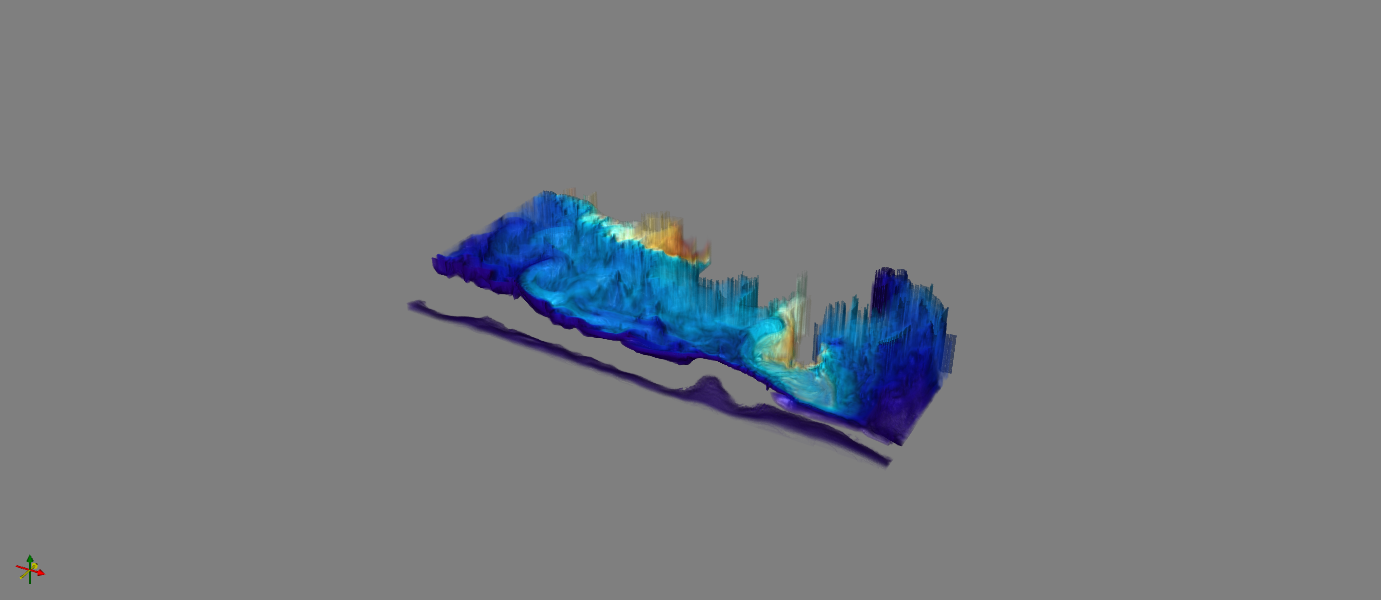
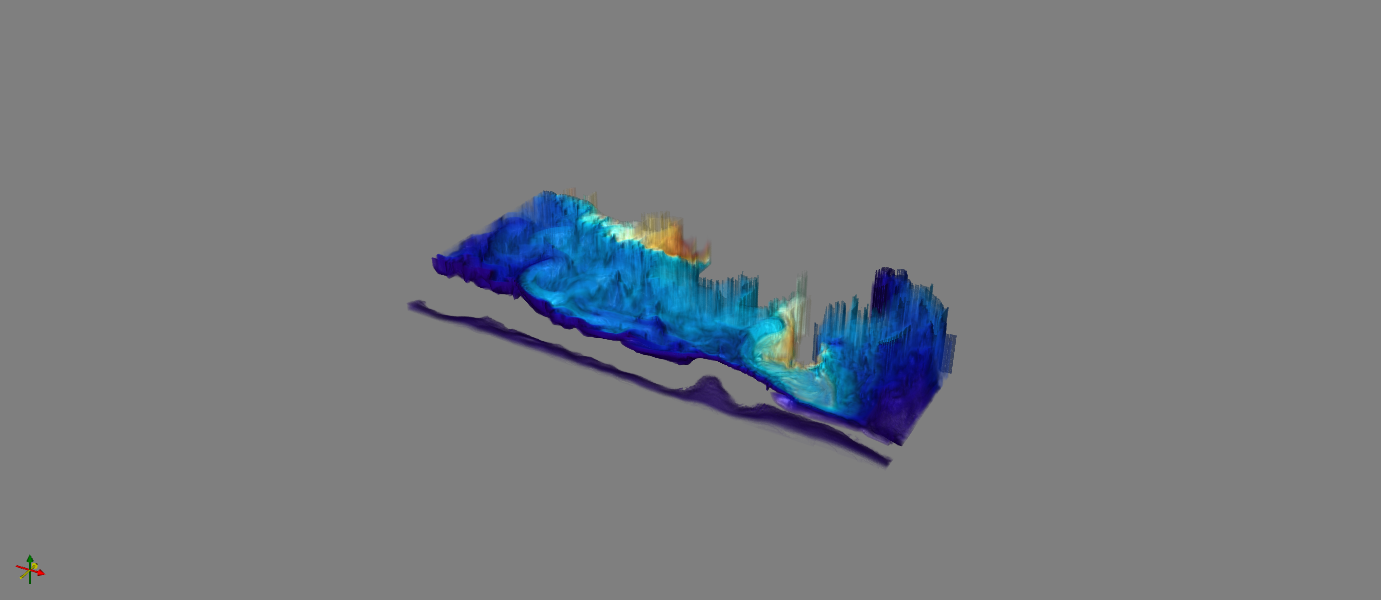

<IPython.core.display.Javascript object>

In [6]:
view(
    ds.salt.isel(ocean_time=0),
    ui_collapsed=False,
    cmap="Warm to Cool (Extended)",
    sample_distance=0,
    color_range=[1, 36],
    gradient_opacity=0.25,
    gradient_opacity_scale=0.1
)